# RandomForests Red Wine Classification

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Ready CSV 

In [2]:
df = pd.read_csv("./Resources/Data/winequality-red-clean.csv", delimiter=',')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Fair
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Fair
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Fair
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Fair
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,Fair
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Fair
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Fair
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Fair


# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
X = df.drop(['quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)


(1359, 11) (1359,)


# Create a Train Test Split

--------
1
RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True)
(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
k: 1, Train/Test Score: 1.000/0.927
OOB_Score : 0.8717139852786541
--------
2
RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_jobs=-1,
                       oob_score=True)
(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
k: 2, Train/Test Score: 0.992/0.916
OOB_Score : 0.8738170347003155
--------
3
RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_jobs=-1,
                       oob_score=True)
(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
k: 3, Train/Test Score: 0.978/0.919
OOB_Score : 0.8727655099894848
--------
4
RandomForestClassifier(criterion='entropy', min_samples_leaf=4, n_jobs=-1,
                       oob_score=True)
(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
k: 4, Train/Test Score: 0.958/0.916
OOB_Score : 0.8675078864353313
--------
5
RandomForestClassifier(criterion='entropy', min_samples_leaf

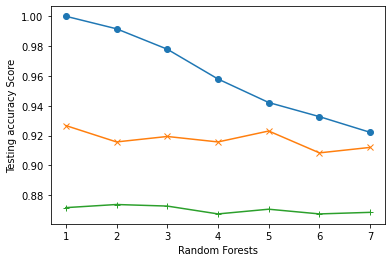

In [5]:
#Train your first model with default parameters
from sklearn.ensemble import RandomForestClassifier
train_scores = []
val_scores = []
oob_scores = []
for k in range(1, 8, 1):
    rf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=k,
                                n_jobs=-1,
                                oob_score=True,
                                criterion='entropy')

    print("--------")
    print(k)
    print(rf)
    X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
    X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.33,random_state=3)

    print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
    rf = rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    oob_score = rf.oob_score_
    train_scores.append(train_score)
    val_scores.append(val_score)
    oob_scores.append(oob_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{val_score:.3f}")
    #what is the percentage of accuracy
    #print(f"Accuracy of the train set : {rf.score(X_train, y_train)}")
    ##what is the percentage of accuracy for the validaton set
    #print(f"Accuracy of the validation set : {rf.score(X_val, y_val)}")
    #the score shows the percentage that are correct   
    
    print(f"OOB_Score : {rf.oob_score_}")

plt.plot(range(1, 8, 1), train_scores, marker='o')
plt.plot(range(1, 8, 1), val_scores, marker="x")
plt.plot(range(1, 8, 1), oob_scores, marker="+")
plt.xlabel("Random Forests")
plt.ylabel("Testing accuracy Score")
plt.show()

--------
1
RandomForestClassifier(n_jobs=-1, oob_score=True)
(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
k: 1, Train/Test Score: 1.000/0.912
OOB_Score : 0.8748685594111462
--------
2
RandomForestClassifier(min_samples_leaf=2, n_jobs=-1, oob_score=True)
(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
k: 2, Train/Test Score: 0.983/0.919
OOB_Score : 0.8696109358569927
--------
3
RandomForestClassifier(min_samples_leaf=3, n_jobs=-1, oob_score=True)
(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
k: 3, Train/Test Score: 0.968/0.919
OOB_Score : 0.8748685594111462
--------
4
RandomForestClassifier(min_samples_leaf=4, n_jobs=-1, oob_score=True)
(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
k: 4, Train/Test Score: 0.952/0.919
OOB_Score : 0.8717139852786541
--------
5
RandomForestClassifier(min_samples_leaf=5, n_jobs=-1, oob_score=True)
(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
k: 5, Train/Test Score: 0.938/0.919
OOB_Score : 0.8748685594111462
--------
6
RandomForestCl

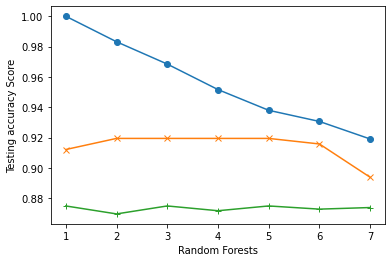

In [6]:
#Train your first model with default parameters
from sklearn.ensemble import RandomForestClassifier
train_scores = []
val_scores = []
oob_scores = []
for k in range(1, 8, 1):
    rf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=k,
                                n_jobs=-1,
                                oob_score=True,
                                criterion='gini')

    print("--------")
    print(k)
    print(rf)
    X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
    X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.33,random_state=3)

    print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
    rf = rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    oob_score = rf.oob_score_
    train_scores.append(train_score)
    val_scores.append(val_score)
    oob_scores.append(oob_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{val_score:.3f}")
    #what is the percentage of accuracy
    #print(f"Accuracy of the train set : {rf.score(X_train, y_train)}")
    ##what is the percentage of accuracy for the validaton set
    #print(f"Accuracy of the validation set : {rf.score(X_val, y_val)}")
    #the score shows the percentage that are correct   
    
    print(f"OOB_Score : {rf.oob_score_}")

plt.plot(range(1, 8, 1), train_scores, marker='o')
plt.plot(range(1, 8, 1), val_scores, marker="x")
plt.plot(range(1, 8, 1), oob_scores, marker="+")
plt.xlabel("Random Forests")
plt.ylabel("Testing accuracy Score")
plt.show()

In [7]:
rf = RandomForestClassifier(min_samples_leaf=6, n_jobs=-1, oob_score=True)
best_rf = rf
print(best_rf)
X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)
best_rf.fit(X_train_c, y_train_c)
print(f'Train and Validation Concat: {best_rf.score(X_train_c,y_train_c)}')
print(f'Validation set: {best_rf.score(X_val,y_val)}')
print(f'Final result: {best_rf.score(X_test,y_test)}')

RandomForestClassifier(min_samples_leaf=6, n_jobs=-1, oob_score=True)
Train and Validation Concat: 0.9313725490196079
Validation set: 0.9523809523809523
Final result: 0.8740740740740741


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [11]:
# Create the GridSearchCV model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'n_estimators':[100, 200],
              'min_samples_leaf':[1,2,3,4,5,6]}
             
                       
grid = GridSearchCV(rf, param_grid, verbose=3, return_train_score=True)


In [12]:
# Train the model with GridSearch
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.33,random_state=3)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
grid.fit(X_train, y_train)

(951, 11) (273, 11) (135, 11) (951,) (273,) (135,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.859) total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.874) total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.837) total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.884) total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.868) total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.853) total time=   0.2s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.874) total time=   0.2s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_est

[CV 4/5] END criterion=entropy, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.879) total time=   0.2s
[CV 5/5] END criterion=entropy, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.879) total time=   0.2s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.991, test=0.874) total time=   0.1s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.992, test=0.868) total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.853) total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.992, test=0.895) total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.987, test=0.874) total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=200;, score=(train=0.995, test=0.869) total time=   0.2s
[CV 2/5] END criterion=e

GridSearchCV(estimator=RandomForestClassifier(min_samples_leaf=6, n_jobs=-1,
                                              oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=3)

In [13]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 100}
0.8727638467897492


In [14]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.088156,0.009930,0.010011,0.000630,gini,1,100,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.858639,0.873684,...,0.864359,0.016046,20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.150318,0.000719,0.016463,0.000167,gini,1,200,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.853403,0.873684,...,0.869628,0.010494,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.080879,0.002277,0.009704,0.000165,gini,2,100,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.858639,0.863158,...,0.865412,0.005168,17,0.986842,0.982917,0.980289,0.984231,0.982917,0.983439,0.002130
3,0.148699,0.002179,0.016538,0.000153,gini,2,200,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.863874,0.863158,...,0.867512,0.013020,13,0.985526,0.984231,0.980289,0.986859,0.980289,0.983439,0.002703
4,0.081908,0.001935,0.009886,0.000178,gini,3,100,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.848168,0.873684,...,0.861212,0.010639,23,0.964474,0.959264,0.960578,0.961892,0.961892,0.961620,0.001728


In [15]:
#Now that  found my best parameters I combine train and val and I do it one more time

In [16]:
best_rf = grid.best_estimator_

print(best_rf)

best_rf.fit(X_train, y_train)
print(best_rf.score(X_train, y_train), best_rf.score(X_val, y_val))

X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)

best_rf.fit(X_train_c, y_train_c)
print(best_rf.score(X_train_c,y_train_c), best_rf.score(X_val,y_val))
print(f'Final result {best_rf.score(X_test,y_test)}')

RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_jobs=-1,
                       oob_score=True)
0.9936908517350158 0.9230769230769231
0.988562091503268 0.989010989010989
Final result 0.8740740740740741


In [17]:
predictions = best_rf.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
print(pred_act.Prediction.value_counts())
print(pred_act.Actual.value_counts())

Fair         129
Very Good      6
Name: Prediction, dtype: int64
Fair         114
Very Good     21
Name: Actual, dtype: int64


In [18]:
# Calculate classification report
y_names = ['Fair','Very Good']
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.88      0.99      0.93       114
   Very Good       0.83      0.24      0.37        21

    accuracy                           0.87       135
   macro avg       0.85      0.61      0.65       135
weighted avg       0.87      0.87      0.84       135



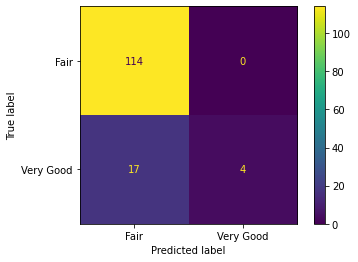

In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(rf, X_test, y_test)  
plt.show() 

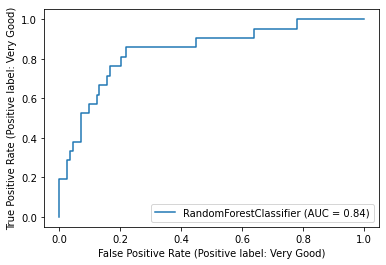

In [20]:
from sklearn.metrics import plot_roc_curve
rf_disp = plot_roc_curve(rf, X_test, y_test)
plt.show()

[[113   1]
 [ 16   5]]
['Fair' 'Very Good']


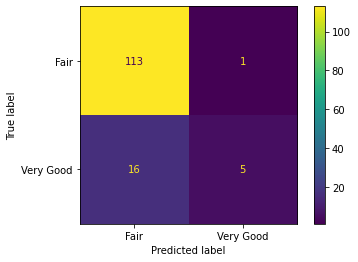

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf.classes_)
print(disp)
disp.plot() 
print(cm)
print(rf.classes_)
print(disp)
plt.show()

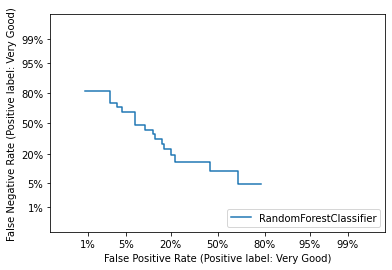

In [22]:
from sklearn import metrics
rf_disp = metrics.plot_det_curve(rf, X_test, y_test)  
plt.show()   

## Display features importance

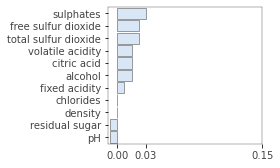

In [23]:
from rfpimp import *
imp = importances(best_rf, X_test, y_test, n_samples=-1)

viz = plot_importances(imp)
viz.view()

In [24]:
# Drop less import features
X = df.drop(['chlorides','density','residual sugar', 'pH','quality'], axis = 1)
X


,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,11.0,34.0,0.56,9.4
1,7.8,0.880,0.00,25.0,67.0,0.68,9.8
2,7.8,0.760,0.04,15.0,54.0,0.65,9.8
3,11.2,0.280,0.56,17.0,60.0,0.58,9.8
4,7.4,0.660,0.00,13.0,40.0,0.56,9.4
...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,28.0,38.0,0.82,9.5
1355,6.2,0.600,0.08,32.0,44.0,0.58,10.5
1356,5.9,0.550,0.10,39.0,51.0,0.76,11.2
1357,5.9,0.645,0.12,32.0,44.0,0.71,10.2


In [25]:
y

0       Fair
1       Fair
2       Fair
3       Fair
4       Fair
        ... 
1354    Fair
1355    Fair
1356    Fair
1357    Fair
1358    Fair
Name: quality, Length: 1359, dtype: object

In [27]:
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.33,random_state=3)


In [28]:
best_rf = grid.best_estimator_

print(best_rf)

best_rf.fit(X_train, y_train)
print(best_rf.score(X_train, y_train), best_rf.score(X_val, y_val))

X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)

best_rf.fit(X_train_c, y_train_c)
print(best_rf.score(X_train_c,y_train_c), best_rf.score(X_val,y_val))
print(f'Final result {best_rf.score(X_test,y_test)}')

RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_jobs=-1,
                       oob_score=True)
0.9863301787592008 0.9120879120879121
0.9861111111111112 0.9853479853479854
Final result 0.8592592592592593
